## Introduction to natural language processing

Natural language processing (NLP) is a collective term referring to computational processing of human languages. It includes methods that analyse human-produced text, and methods that create natural language as output. Compared to many other machine learning tasks, natural language processing is very challenging, as human language is inherently ambiguous, ever-changing, and not well-defined. 

![read_robot](./images/read_robot.jpg)

There is a need for better and better NLP-algorithms, as information in the textual format is increasing exponentially.

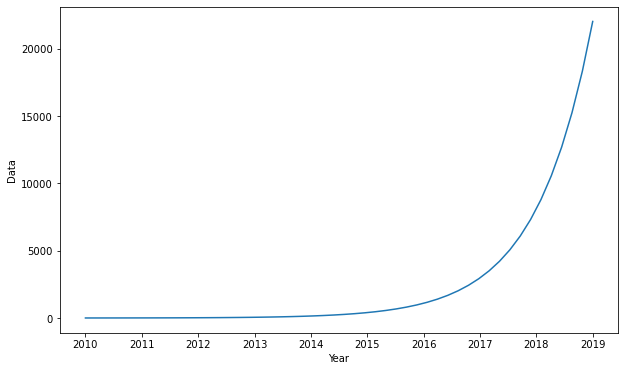

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.plot(np.linspace(1,10,50),np.exp(np.linspace(1,10,50)))
plt.xticks(range(1,11),labels=range(2010,2020))
plt.xlabel('Year')
plt.ylabel('Data')
plt.show()

Until 2014, core NLP techniques were dominated by linear modelling approaches that use supervised learning. Key algorithms were simple neural networks, support vector machines and logistic regression, trained over high dimensional and sparse feature vectors (bag-of-words -vectors).

![SVM](./images/svm.png)

Around 2014, the field has started to see some success in switching from linear models over sparse inputs to nonlinear complex neural network models over dense inputs. A key difference is how words are presented as relatively low-dimensional vectors that contain semantic information about the word. Two key training algorithms are **continuous-bag-of-words** and **skip-gram** -algorithms.

The CBOW model architecture tries to predict the current target word (the centre word) based on the source context words (surrounding words).

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the centre word).

![word2vec](./images/word2vec.png)

Some of the neural-network techniques are generalisations of the linear models and can be just replaced in place of the linear classifiers. Others have a totally new approach for a natural language processing task and provide new modelling opportunities. In particular, a family of approaches based on recurrent neural networks (RNNs) removes the reliance on the Markov assumption that was prevalent in sequence models, allowing to condition on arbitrarily long sequences and produce effective feature extractors. This enables the models to analyse whole sentences (and even more) instead of words, which has led to breakthroughs in language modelling, automatic machine translation, and various other applications.

Also, recent transformers-based models have achieved revolutionary results. The success of the architecture is based on a concept called attention that improves the learning by focusing on the key features and ignoring features that do not help in the task at hand. This conceptually simple innovation is largely behind the success of pre-trained models like BERT and GPT-3. The transformer is an architecture for transforming one sequence into another one with the help of two parts (Encoder and Decoder), but it differs from the previously described/existing sequence-to-sequence models because it does not imply any recurrent architectures.

(The Markov assumption means that The Markov property holds. A stochastic process has the Markov property if the conditional probability distribution of future states of the process (conditional on both past and present states) depends only upon the present state, not on the sequence of events that preceded it.)


### Topic models
A topic model is a type of statistical model for inferring the "topics" or "themes" that occur in a collection of documents. Topic modelling is a popular tool for the discovery of hidden semantic structures in a text body. Topic models assume that there are typical words that appear more frequently in a document with a certain topic. Moreover, some words are especially rare for a certain topic and for some words, there is no difference between a document with the topic and other documents. The "topics" produced by topic modelling techniques are clusters of similar words. For example, a very popular topic model called Latent Dirichlet Allocation assumes that documents are distributions of topics and topics are distributions of words.

![topic_model](./images/topic_model.gif)

### Neural network models

Neural language models almost always use continuous representations or embeddings of words to make their predictions. These embeddings are usually implemented as layers in a neural language model. The embeddings help to alleviate the curse of dimensionality in language modelling: larger corpus --> larger vocabulary --> exponentially larger number of possible sequences of words.

Neural language models represent words in a distributed way, as a combination of weights in a neural network. Typical neural network architectures are feed-forward, recurrent, LSTM and transformers architectures.

### Pretrained language models

![elmo](./images/elmo.jpg)

#### BERT
Bidirectional Encoder Representations from Transformers (BERT) is a pre-trained NLP model developed by Google. 

The original English-language BERT model comes with two pre-trained general types: (1) the BERTBASE which uses the BooksCorpus with 800M words, and (2) the BERTLARGE that uses the English Wikipedia with 2,500M words.

At the time introduction, BERT achieved state-of-the-art in many NLP tasks, like language understanding and question answering. BERT started the revolution of modern language models.

(In the picture above is Elmo, not Bert. However, there is also a language model called Elmo:[allennlp.org](https://allennlp.org/elmo)

#### GPT-3
GPT-3 is the current state-of-the-art language model that has achieved revolutionary results. It is also the largest ML model to date, with 175 billion parameters. It was trained with data that has 499 billion tokens (words). For example, GPT-3 can create news articles that are difficult to distinguish from human-created news. It is also able to have conversations with a human. However, despite its' stellar performance in creating meaningful text, it still does not understand anything that it is saying.
Below is an example article generated by GPT-3.

![gpt3_text](./images/gpt3_desc_text.jpg)

### NLP example - LDA and other summarisation tools
In this example, we analyse a collection of academic journals with Latent Dirichlet Allocation (LDA) and other summarisation tools.

To manipulate and list files in directories, we need the **os** -library.

In [2]:
import os

I have the data in the acc_journals -folder that is under the work folder. Unfortunately, this data is not available anywhere. If you want to follow this example, just put a collection of txt-files to a "acc_journals"-folder (under the work folder) and follow the steps.

In [3]:
data_path = './acc_journals/'

**listdir()** makes a list of filenames inside **data_path**

In [4]:
files = os.listdir(data_path)

The name of the first text file is "2019_1167.txt".

In [5]:
files[0]

'2019_1167.txt'

In total, we have 2126 articles.

In [6]:
len(files)

2126

The filenames have a publication year as the first four digits of the name. With the following code we can collect the publication years to a list.

In [7]:
file_years = []
for file in files:
    file_years.append(int(file[:4])) # Pick the first four letters from the filename -string and turn it into a integer.

In [8]:
[file_years.count(a) for a in set(file_years)]

[260, 296, 297, 134, 128, 129, 174, 234, 226, 248]

In this example we will need **numpy** to manipulate arrays, and **Matplotlib** for plots.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Let's plot the number of documents per year.

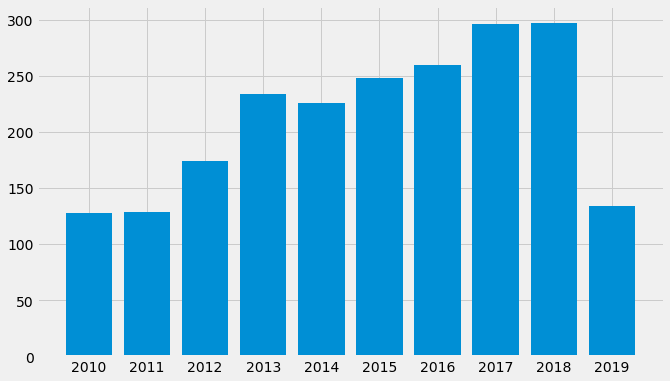

In [11]:
plt.style.use('fivethirtyeight') # Define the style of figures.
plt.figure(figsize=[10,6]) # Define the size of figures.
# The first argument: years, the second argument: the list of document frequencies for different years (built using list comprehension)
plt.bar(list(set(file_years)),[file_years.count(a) for a in set(file_years)]) 
plt.xticks(list(set(file_years))) # The years below the bars
plt.show()

The common practice is to remove **stopwords** from documents. These are common fill words that do not contain information about the content of documents. We use the stopwords-list from the NLTK library (www.nltk.org). Here is a short description of NLTK from their web page: "NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum."

In [12]:
from nltk.corpus import stopwords

In [13]:
stop_words = stopwords.words("english")

Here are some example stopwords.

In [14]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Usually, stopword-lists are extended with useless words specific to the corpus we are analysing. That is done below. These additional words are found by analysing the results at different steps of the analysis. Then the analysis is repeated.

In [15]:
stop_words.extend(['fulltext','document','downloaded','download','emerald','emeraldinsight',
                   'accepted','com','received','revised','archive','journal','available','current',
                   'issue','full','text','https','doi','org','www','com''ieee','cid','et','al','pp',
                   'vol','fig','reproduction','prohibited','reproduced','permission','accounting','figure','chapter'])

The following code reads every file in the **files** list and reads it content as an item to the **raw_text** list. Thus, we have a list with 2126 items and where each item is a raw text of one document.

In [16]:
raw_text = []
for file in files:
    fd = open(os.path.join(data_path,file),'r',errors='ignore')
    raw_text.append(fd.read())

Here is an example of raw text from the first document.

In [17]:
raw_text[0][3200:3500]

'currency exchanges and markets have daily dollar volume of around $50 billion.1 Over 300 "cryptofunds" have emerged (hedge funds that invest solely in cryptocurrencies), attracting around $10 billion in assets under management (Rooney and Levy 2018).2 Recently, bitcoin futures have commenced trading'

For the following steps, we need Gensim that is a multipurpose NLP library specially designed for topic modelling.

Here is a short description from the Gensim Github-page ([github.com/RaRe-Technologies/gensim](https://github.com/RaRe-Technologies/gensim)):

"Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.
Features:
* All algorithms are memory-independent w.r.t. the corpus size (can process input larger than RAM, streamed, out-of-core),
* Intuitive interfaces
    * Easy to plug in your own input corpus/datastream (trivial streaming API)
    * Easy to extend with other Vector Space algorithms (trivial transformation API)
* Efficient multicore implementations of popular algorithms, such as online Latent Semantic Analysis (LSA/LSI/SVD), Latent Dirichlet Allocation (LDA), Random Projections (RP), Hierarchical Dirichlet Process (HDP) or word2vec deep learning.
* Distributed computing: can run Latent Semantic Analysis and Latent Dirichlet Allocation on a cluster of computers."

In [18]:
import gensim

Gensim has a convenient **simple_preprocess()** -function that makes many text cleaning procedures automatically. It converts a document into a list of lowercase tokens, ignoring tokens that are too short (less than two characters) or too long (more than 15 characters). The following code goes through all the raw texts and applies **simple_preprocess()** to them. So, docs_cleaned is a list with lists of tokens as items.

In [19]:
docs_cleaned = []
for item in raw_text:
    tokens = gensim.utils.simple_preprocess(item)
    docs_cleaned.append(tokens)

Here is an example from the first document after cleaning. The documents are now lists of tokens, and here the list is joined back as a string of text.

In [42]:
" ".join(docs_cleaned[0][300:400])

'for assistance relating to data acknowledges financial support from the capital markets co operative research centre acknowledges financial support from the australian research council arc de supplementary data can be found on the review of financial studies web site send correspondence to talis putnins uts business school university of technology sydney po box broadway nsw australia telephone mail talis putnins uts edu au the author published by oxford university press on behalf of the society for financial studies all rights reserved for permissions please mail journals permissions oup com doi rfs hhz downloaded from https academic oup com rfs article'

Next, we remove the stopwords from the documents. 

In [21]:
docs_nostops = []
for item in docs_cleaned:
    red_tokens = [word for word in item if word not in stop_words]
    docs_nostops.append(red_tokens)

An example text from the first document after removing the stopwords.

In [22]:
" ".join(docs_nostops[0][300:400])

'hedge funds invest solely attracting around billion assets management rooney levy recently bitcoin futures commenced trading cme cboe catering institutional demand trading hedging bitcoin fringe asset quickly maturing rapid growth anonymity provide users created considerable regulatory challenges application million cryptocurrency exchange traded fund etf rejected securities exchange commission sec march several rejected amid concerns including lack regulation chinese government banned residents trading made initial coin offerings icos illegal september central bank heads bank england mark carney publicly expressed concerns many potential benefits including faster efficient settlement payments regulatory concerns center around use illegal trade drugs hacks thefts illegal pornography even'

As a next step, we remove everything else but nouns, adjectives, verbs and adverbs recognised by our language model. As our language model, we use the large English model from Spacy ([spacy.io](https://spacy.io/)). Here are some key features of Spacy from their web page:
* Non-destructive tokenisation
* Named entity recognition
* Support for 59+ languages
* 46 statistical models for 16 languages
* Pretrained word vectors
* State-of-the-art speed
* Easy deep learning integration
* Part-of-speech tagging
* Labelled dependency parsing
* Syntax-driven sentence segmentation
* Built-in visualisers for syntax and NER
* Convenient string-to-hash mapping
* Export to NumPy data arrays
* Efficient binary serialisation
* Easy model packaging and deployment
* Robust, rigorously evaluated accuracy

First, we load the library.

In [23]:
import spacy

Then we define that only certain part-of-speed (POS) -tags are allowed.

In [24]:
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

The **en_core_web_lg** model is quite large (700MB) so it takes a while to download it. We do not need the dependency parser  or named-entity-recognition, so we disable them.

In [25]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

The following code goes through the documents and removes words that are not recognised by our language model as nouns, adjectives, verbs or adverbs.

In [26]:
docs_lemmas = []
for red_tokens in docs_nostops:
    doc = nlp(" ".join(red_tokens)) # We need to join the list of tokens back to a single string.
    docs_lemmas.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

Here is again an example text from the first document. Things are looking good. We have a clean collection of words that are meaningful when we try to figure out what is discussed in the text.

In [52]:
" ".join(docs_lemmas[0][300:400])

'silk road marketplace combine public nature blockchain provide unique laboratory analyze illegal ecosystem evolve bitcoin network individual identity mask pseudo anonymity character alpha public nature blockchain allow link bitcoin transaction individual user market participant identify user release see next autonomous future commence trade contract bitcoin price approximately bitcoin time future launch contract notional value academic library user review financial study seize authority bitcoin seizure combine source provide sample user know involved illegal activity starting point analysis apply different empirical approach go sample estimate population illegal activity first approach exploit trade network user know involve illegal activity illegal user use bitcoin'

Next, we build our bigram-model. Bigrams are two-word pairs that naturally belong together. Like the words New and York. We connect these words before we do the LDA analysis.

In [27]:
bigram = gensim.models.Phrases(docs_lemmas,threshold = 80, min_count=3) 
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [28]:
docs_bigrams = [bigram_mod[doc] for doc in docs_lemmas]

In this sample text, the model creates bigrams academic_library, starting_point and bitcoin_seizure. The formed bigrams are quite good. It is very often difficult to set the parameters of **Phrases** so that we have only reasonable bigrams.

In [29]:
" ".join(docs_bigrams[0][300:400])

'evolve bitcoin network individual identity mask pseudo anonymity character alpha public nature blockchain allow link bitcoin transaction individual user market participant identify user release see next autonomous future commence trade contract bitcoin price approximately bitcoin time future launch contract notional value academic_library user review financial study seize authority bitcoin_seizure combine source provide sample user know involved illegal activity starting_point analysis apply different empirical approach go sample estimate population illegal activity first approach exploit trade network user know involve illegal activity illegal user use bitcoin_blockchain reconstruct complete network transaction market participant apply type network cluster analysis identify distinct community datum legal'

### LDA

![lda](./images/topic_model.gif)

Okay, let's start our LDA analysis. For this, we need the **corpora** module from Gensim.

In [30]:
import gensim.corpora as corpora

First, with, **Dictionary**, we build our dictionary using the list docs_bigrams. Then we filter the most extreme cases from the dictionary:
* no_below = 2 : no words that are in less than two documents
* no_above = 0.7 : no words that are in more than 70 % of the documents
* keep_n = 50000 : keep the 50000 most frequent words

In [49]:
id2word = corpora.Dictionary(docs_bigrams)
id2word.filter_extremes(no_below=2, no_above=0.7, keep_n=50000)

Then, we build our corpus by indexing the words of documents using our **id2word** -dictionary

In [32]:
corpus = [id2word.doc2bow(text) for text in docs_bigrams]

**corpus** contains a list of tuples for every document, where the first item of the tuples is a word-index and the second is the frequency of that word in the document.

For example, in the first document, a word with index 0 in our dictionary is once, a word with index 1 is four times, etc.

In [34]:
corpus[0][0:10]

[(0, 1),
 (1, 4),
 (2, 3),
 (3, 50),
 (4, 5),
 (5, 4),
 (6, 5),
 (7, 1),
 (8, 2),
 (9, 2)]

We can check what those words are just by indexing our dictionary **id2word**. As you can see, 'accept' is 50 times in the first document.

In [58]:
[id2word[i] for i in range(10)]

['abnormal',
 'absolute',
 'ac',
 'academic_library',
 'accept',
 'access',
 'accessible',
 'accompany',
 'accuracy',
 'achieve']

This is the main step in our analysis; we build the LDA model. There are many parameters in Gensim's **LdaModel**. Luckily the default parameters work quite well. You can read more about the parameters from [radimrehurek.com/gensim/models/ldamodel.html](https://radimrehurek.com/gensim/models/ldamodel.html)

In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=len(corpus),
                                           passes=10,
                                           alpha='asymmetric',
                                           per_word_topics=False,
                                            eta = 'auto')

**pyLDAvis** is a useful library to visualise the results: [github.com/bmabey/pyLDAvis](https://github.com/bmabey/pyLDAvis).

In [60]:
import pyLDAvis.gensim

In [61]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

/home/mikkoranta/python3/gensim/lib/python3.8/site-packages/joblib/numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/mikkoranta/python3/gensim/lib/python3.8/site-packages/joblib/numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


With pyLDAvis, we get an interactive figure with intertopic distances and the most important words for each topic. More separate the topic "bubbles" are, better the model.

In [62]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.054570  0.094030       1        1  12.683397
5      0.160369 -0.010888       2        1  12.214055
1     -0.101041 -0.038151       3        1  11.917991
4     -0.059448 -0.054195       4        1  10.419438
8      0.141674 -0.055214       5        1   9.611352
0     -0.055842  0.078989       6        1   9.265445
2      0.008914 -0.068989       7        1   9.096837
9     -0.004656  0.089707       8        1   8.586726
3     -0.092769 -0.023839       9        1   8.564392
6     -0.051771 -0.011450      10        1   7.640363, topic_info=            Term          Freq         Total Category  logprob  loglift
246     consumer  36331.000000  36331.000000  Default  30.0000  30.0000
2158        team  17458.000000  17458.000000  Default  29.0000  29.0000
928        price  29293.000000  29293.000000  Default  28.0000  28.0000
1922     patient  15860.000000  15860.000000  Default  27.0000  27.0000
3290       brand  13009.000000  13009.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
67        assess   1213.650391   6812.306641  Topic10  -6.0535   0.8466
556   hypothesis   1287.344727  10715.598633  Topic10  -5.9945   0.4526
1641  evaluation   1221.849121   7327.187988  Topic10  -6.0467   0.7805
1072      sample   1259.407959  15868.179688  Topic10  -6.0165   0.0381
868      partner   1189.060547   6038.732910  Topic10  -6.0739   0.9467

[920 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
28984      3  0.971262   abductive_reasoning
28984      8  0.010013   abductive_reasoning
3249       1  0.005807  academic_institution
3249       3  0.008710  academic_institution
3249       4  0.894258  academic_institution
...      ...       ...                   ...
6402       5  0.028046                    xn
28531      8  0.015203      yearly_quarterly
28531      9  0.015203      yearly_quarterly
28531     10  0.942573      yearly_quarterly
8845       1  0.966346               yoplait

[4808 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 2, 5, 9, 1, 3, 10, 4, 7])

We need **pandas** to present the most important words in a dataframe.

In [64]:
import pandas as pd

The following code builds a dataframe from the ten most important words for each topic. Now our task would be to figure out the topics from these words.

In [65]:
top_words_df = pd.DataFrame()
for i in range(10):
    temp_words = lda_model.show_topic(i,10)
    just_words = [name for (name,_) in temp_words]
    top_words_df['Topic ' + str(i+1)] = just_words

In [66]:
top_words_df

Topic 1         Topic 2     Topic 3         Topic 4    Topic 5  \
0      privacy         project     network            team    manager   
1     security      innovation  investment            task  marketing   
2     perceive            idea  innovation          member   analytic   
3      patient  organizational     country         network     people   
4      website          action  capability  organizational   employee   
5          web         digital   strategic         project  financial   
6  participant        activity    platform             job       risk   
7     consumer       community    standard        employee        big   
8    intention        software     digital   communication  corporate   
9     attitude            goal        risk             tie     return   

        Topic 6         Topic 7    Topic 8    Topic 9     Topic 10  
0         price      capability   consumer      price         sale  
1       optimal  organizational  marketing    patient  participant  
2        demand       construct      brand     demand     retailer  
3  distribution          patent     medium     period        trust  
4        policy       strategic      price     policy     consumer  
5        inform            item   purchase   capacity        store  
6      contract         feature     search  inventory          app  
7     operation   communication    network       risk         game  
8      solution         manager    content  operation       sample  
9      supplier       operation       sale    pricing         task

The following steps will build a figure with the evolution of each topic. These are calculated by evaluating the weight of each topic in the documents for a certain year and then summing up these weights.

In [69]:
evolution = np.zeros([len(corpus),10]) # We pre-build the numpy array filled with zeroes.
ind = 0
for bow in corpus:
    topics = lda_model.get_document_topics(bow)
    for topic in topics:
        evolution[ind,topic[0]] = topic[1]
    ind+=1

We create a pandas dataframe from the NumPy array and add the years and column names.

In [70]:
evolution_df = pd.DataFrame(evolution)
evolution_df['Year'] = file_years
evolution_df['Date'] = pd.to_datetime(evolution_df['Year'],format = "%Y") # Change Year to datetime-object.
evolution_df.set_index('Date',inplace=True) # Set Date as an index of the dataframe
evolution_df.drop('Year',axis=1,inplace = True)

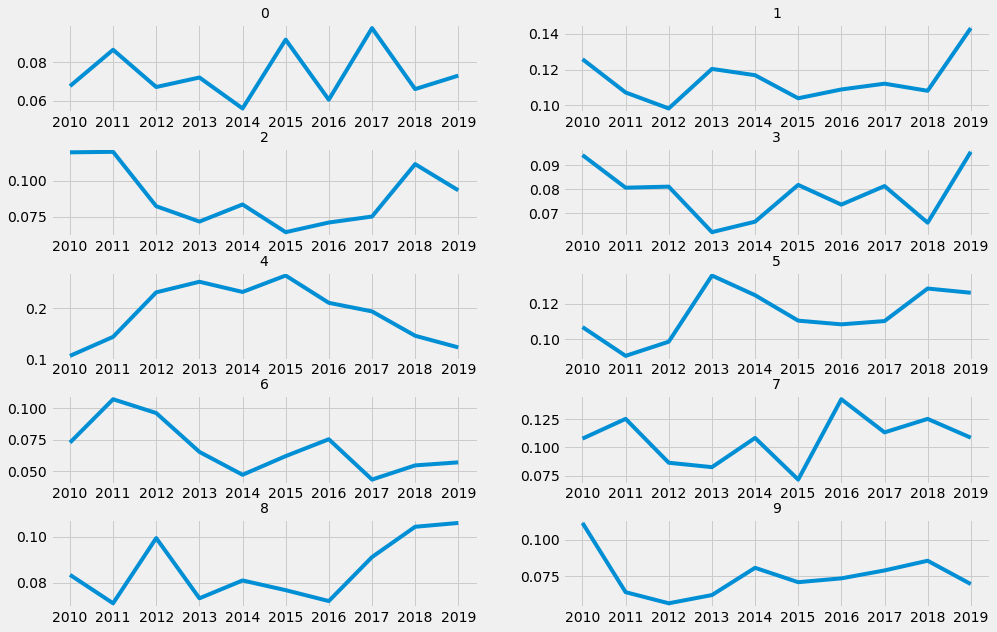

In [71]:
plt.style.use('fivethirtyeight')
fig,axs = plt.subplots(5,2,figsize = [15,10])
for ax,column in zip(axs.flat,evolution_df.groupby('Date').mean().columns):
    ax.plot(evolution_df.groupby('Date').mean()[column])
    ax.set_title(column,{'fontsize':14})
plt.subplots_adjust(hspace=0.4)

Next, we plot the marginal topic distribution, i.e., the relative importance of the topics. It is calculated by summing the topic weights of all documents.

First, we calculate the topic weights for every document.

In [86]:
doc_tops = []
for doc in corpus:
    doc_tops.append([item for (_,item) in lda_model.get_document_topics(doc)])
doc_tops_df = pd.DataFrame(doc_tops,columns=top_words_df.columns)

Then, we sum (and plot) these weights.

In [98]:
doc_tops_df = doc_tops_df/doc_tops_df.sum().sum()

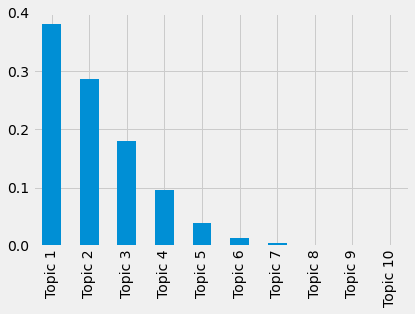

In [99]:
doc_tops_df.sum(axis=0).plot.bar()

As our subsequent analysis, let's search the most representative document for each topic. It is the document that has the largest weight for a certain topic.

In [100]:
doc_topics = []
for doc in corpus:
    doc_topics.append([item for (_,item) in lda_model.get_document_topics(doc)])               

In [101]:
temp_df = pd.DataFrame(doc_topics)

With **idxmax()**, we can pick up the index that has the largest weight.

In [102]:
temp_df.idxmax()

0    1172
1    1775
2     858
3    1705
4    1644
5     133
6     517
7    1203
8     303
dtype: int64

We can now use **files** to connect indices to documents. For example, the most representative document of Topic 1 (index 0) is "PRACTICING SAFE COMPUTING: A MULTIMETHOD EMPIRICAL EXAMINATION OF HOME COMPUTER USER SECURITY BEHAVIORAL INTENTIONS"

In [105]:
files[1172]

'2010_2729.txt'

In [106]:
raw_text[1172][0:500]

'Anderson & Agarwal/Practicing Safe Computing\n\nSPECIAL ISSUE\n\nPRACTICING SAFE COMPUTING: A MULTIMETHOD EMPIRICAL EXAMINATION OF HOME COMPUTER USER SECURITY BEHAVIORAL INTENTIONS1\n\nBy: Catherine L. Anderson Decision, Operations, and Information Technologies Department Robert H. Smith School of Business University of Maryland Van Munching Hall College Park, MD 20742-1815 U.S.A. Catherine_Anderson@rhsmith.umd.edu\nRitu Agarwal Center for Health Information and Decision Systems Robert H. Smith School '

Let's build a master table that has the document names and other information.

In [107]:
master_df = pd.DataFrame({'Article':files})

First, we add the most important topic of each article to the table.

In [108]:
top_topic = []
for doc in corpus:
    test=lda_model.get_document_topics(doc)
    test2 = [item[1] for item in test]
    top_topic.append(test2.index(max(test2))+1)

master_df['Top topic'] = top_topic

With **head()**, we can check the first (ten) values of our dataframe.

In [109]:
master_df.head(10)

Article  Top topic
0   2019_1167.txt          1
1  2017_27218.txt          3
2  2012_40089.txt          3
3   2012_2684.txt          2
4  2015_16392.txt          1
5   2019_3891.txt          1
6   2011_1162.txt          1
7  2015_19684.txt          4
8   2010_2866.txt          2
9  2018_30301.txt          2

**value_counts()** for the "Top topic" -column can be used to check that in how many documents each topic is the most important.

In [110]:
master_df['Top topic'].value_counts()

1    794
2    604
3    402
4    210
5     81
6     23
7      9
9      2
8      1
Name: Top topic, dtype: int64

### Summarisation

Let's do something else. Gensim also includes efficient summarisation-functions (these are not related to LDA any more):

From the **summarization** -module, we can use **summarize** to automatically build a short summarisation of the document. Notice that we use the original documents for this and not the preprocessed ones. **ratio = 0.01** means that the length of the summarisation should be 1 % from the original document.

In [111]:
summary = []
for file in raw_text:
    summary.append(gensim.summarization.summarize(file.replace('\n',' '),ratio=0.01))

Below is an example summary for the first document.

In [113]:
summary[1]

'*NLM Title Abbreviation:*     J Appl Psychol *Publisher:*     US : American Psychological Association *ISSN:*     0021-9010 (Print)     1939-1854 (Electronic) *ISBN:*     978-1-4338-9042-0 *Language:*     English *Keywords:*     ability, personality, interests, motivation, individual differences *Abstract:*     This article reviews 100 years of research on individual differences     and their measurement, with a focus on research published in the     Journal of Applied Psychology.\nWe focus on 3 major individual     differences domains: (a) knowledge, skill, and ability, including     both the cognitive and physical domains; (b) personality, including     integrity, emotional intelligence, stable motivational attributes     (e.g., achievement motivation, core self-evaluations), and     creativity; and (c) vocational interests.\n(PsycINFO Database Record (c) 2017 APA, all     rights reserved) *Document Type:*     Journal Article *Subjects:*     *Individual Differences; *Measurement; *M

In [114]:
master_df['Summaries'] = summary

In [115]:
master_df

Article  Top topic  \
0      2019_1167.txt          1   
1     2017_27218.txt          3   
2     2012_40089.txt          3   
3      2012_2684.txt          2   
4     2015_16392.txt          1   
...              ...        ...   
2121   2016_2942.txt          1   
2122     2016_81.txt          2   
2123  2018_13221.txt          6   
2124  2016_23236.txt          1   
2125  2016_38632.txt          4   

                                              Summaries  
0     We add to the literature on the economics of c...  
1     *NLM Title Abbreviation:*     J Appl Psychol *...  
2     Service Quality in Software-as-a-Service: Deve...  
3     RESEARCH ARTICLE  UNDERSTANDING USER REVISIONS...  
4     *Document Type:*     Article *Subject Terms:* ...  
...                                                 ...  
2121  {rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...  
2122  J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...  
2123  Sinha Carlson School of Management, University...  
2124  *Document Type:*     Article *Subject Terms:* ...  
2125  To understand the trade-offs involved in decid...  

[2126 rows x 3 columns]

The same **summarization** -module also includes a function to search keywords from the documents. It works in the same way as **summarize()**.

In [116]:
keywords = []
for file in raw_text:
    keywords.append(gensim.summarization.keywords(file.replace('\n',' '),ratio=0.01).replace('\n',' '))

Here are keywords for the second document

In [119]:
keywords[1]

'journal journals psychology psychological personality person personal research researchers researched performance performing perform performed performances testing tests test tested measurement measures measureable measure measured measuring ability abilities difference different differing differs study studies studied individual differences individuals differ job jobs interests interesting interested including include includes included traits trait'

In [117]:
master_df['Keywords'] = keywords

In [118]:
master_df

Article  Top topic  \
0      2019_1167.txt          1   
1     2017_27218.txt          3   
2     2012_40089.txt          3   
3      2012_2684.txt          2   
4     2015_16392.txt          1   
...              ...        ...   
2121   2016_2942.txt          1   
2122     2016_81.txt          2   
2123  2018_13221.txt          6   
2124  2016_23236.txt          1   
2125  2016_38632.txt          4   

                                              Summaries  \
0     We add to the literature on the economics of c...   
1     *NLM Title Abbreviation:*     J Appl Psychol *...   
2     Service Quality in Software-as-a-Service: Deve...   
3     RESEARCH ARTICLE  UNDERSTANDING USER REVISIONS...   
4     *Document Type:*     Article *Subject Terms:* ...   
...                                                 ...   
2121  {rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...   
2122  J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...   
2123  Sinha Carlson School of Management, University...   
2124  *Document Type:*     Article *Subject Terms:* ...   
2125  To understand the trade-offs involved in decid...   

                                               Keywords  
0     bitcoin bitcoins user users transactions trans...  
1     journal journals psychology psychological pers...  
2     service services saas research researchers cus...  
3     use uses usefulness features feature user user...  
4     automation automated automate work working hum...  
...                                                 ...  
2121  data ehr ehrs research researchers health pati...  
2122  organizational relationship relationships altr...  
2123  firms firm production product products modelin...  
2124  reviewer reviews review reviewers reviewed rev...  
2125  time timing hire hiring hired management manag...  

[2126 rows x 4 columns]

### Similarities
As a next example, we analyse the similarities between the documents.

Gensim has a specific function for that: **SparseMatrixSimilarity**

In [120]:
from gensim.similarities import SparseMatrixSimilarity

The parameters to the function are the word-frequency corpus and the length of the dictionary.

In [121]:
index = SparseMatrixSimilarity(corpus,num_features=len(id2word))

In [122]:
sim_matrix = index[corpus]

In the similarity matrix, the diagonal has values 1 (similarity of a document with itself). We replace those values with zero to find the most similar documents from the corpus.

In [124]:
for i in range(len(sim_matrix)):
    sim_matrix[i,i] = 0

**Seaborn** (https://seaborn.pydata.org/) has a convenient heatmap function to plot similarities. Here is information about Seaborn from their web page: Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

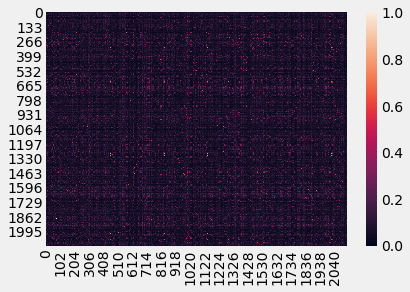

In [125]:
sns.heatmap(sim_matrix)

We search the most similar article by locating the index with a largest value for every column.

In [127]:
master_df['Most_similar_article'] = np.argmax(sim_matrix,axis=1)

In [128]:
master_df

Article  Top topic  \
0      2019_1167.txt          1   
1     2017_27218.txt          3   
2     2012_40089.txt          3   
3      2012_2684.txt          2   
4     2015_16392.txt          1   
...              ...        ...   
2121   2016_2942.txt          1   
2122     2016_81.txt          2   
2123  2018_13221.txt          6   
2124  2016_23236.txt          1   
2125  2016_38632.txt          4   

                                              Summaries  \
0     We add to the literature on the economics of c...   
1     *NLM Title Abbreviation:*     J Appl Psychol *...   
2     Service Quality in Software-as-a-Service: Deve...   
3     RESEARCH ARTICLE  UNDERSTANDING USER REVISIONS...   
4     *Document Type:*     Article *Subject Terms:* ...   
...                                                 ...   
2121  {rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...   
2122  J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...   
2123  Sinha Carlson School of Management, University...   
2124  *Document Type:*     Article *Subject Terms:* ...   
2125  To understand the trade-offs involved in decid...   

                                               Keywords  Most_similar_article  
0     bitcoin bitcoins user users transactions trans...                  1306  
1     journal journals psychology psychological pers...                  2090  
2     service services saas research researchers cus...                    28  
3     use uses usefulness features feature user user...                  1796  
4     automation automated automate work working hum...                  1280  
...                                                 ...                   ...  
2121  data ehr ehrs research researchers health pati...                   301  
2122  organizational relationship relationships altr...                  2070  
2123  firms firm production product products modelin...                  1942  
2124  reviewer reviews review reviewers reviewed rev...                  1917  
2125  time timing hire hiring hired management manag...                   412  

[2126 rows x 5 columns]

### Cluster model

Next, we build a topic analysis using a different approach. We create a TF-IDF model from the corpus and apply K-means clustering for that model.

Explanation of TF-IDF from Wikipedia: "In information retrieval, TF–IDF or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modelling. The TF–IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general."

Explanation of K-means clustering from Wikipedia: "k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centres or cluster centroid), serving as a prototype of the cluster...k-means clustering minimizes within-cluster variances (squared Euclidean distances)..."

![kmeans](./images/kmeans.gif)

From **Gensim.models** we pick up **TfidModel**.

In [129]:
from gensim.models import TfidfModel

As parameters, we need the corpus and the dictionary.

In [131]:
tf_idf_model = TfidfModel(corpus,id2word=id2word)

We use the model to build up a TF-IDF -transformed corpus.

In [141]:
tform_corpus = tf_idf_model[corpus]

**corpus2csc** converts a streamed corpus in bag-of-words format into a sparse matrix, with documents as columns.

In [142]:
spar_matr = gensim.matutils.corpus2csc(tform_corpus)

In [143]:
spar_matr

<32237x2126 sparse matrix of type '<class 'numpy.float64'>'
	with 1897708 stored elements in Compressed Sparse Column format>

Sparse matrix to normal array. Also, we need to transpose it for the K-means model.

In [144]:
tfidf_matrix = spar_matr.toarray().transpose()

In [145]:
tfidf_matrix

array([[0.00125196, 0.00243009, 0.00474072, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00594032, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.0077254 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00396927, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [146]:
tfidf_matrix.shape

(2126, 32237)

Scikit-learn has a function to form a K-means clustering model from a matrix. It is done below. We use ten clusters.

In [147]:
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=10)

kmodel.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [148]:
master_df['Tf_idf_clusters'] = clusters

In [156]:
km.cluster_centers_

array([[ 1.33476883e-03,  4.71424426e-03,  2.62007897e-04, ...,
         2.71050543e-20,  3.38813179e-21,  0.00000000e+00],
       [ 6.67748803e-04,  9.98513608e-04,  9.39093177e-04, ...,
         1.00166900e-03,  6.77626358e-21,  5.77802403e-05],
       [ 1.96181867e-04,  3.44260097e-04,  1.83757076e-04, ...,
        -5.42101086e-20,  0.00000000e+00, -3.38813179e-21],
       ...,
       [ 0.00000000e+00,  3.26892198e-03,  1.67826509e-03, ...,
        -8.13151629e-20, -1.69406589e-21, -3.38813179e-21],
       [ 5.84538250e-04,  1.55948712e-03,  2.28571545e-04, ...,
         0.00000000e+00, -3.38813179e-21, -3.38813179e-21],
       [ 5.10233572e-04,  4.11021862e-03,  1.24048649e-03, ...,
        -2.71050543e-20,  1.69406589e-21, -3.38813179e-21]])

In [152]:
master_df

Article  Top topic  \
0      2019_1167.txt          1   
1     2017_27218.txt          3   
2     2012_40089.txt          3   
3      2012_2684.txt          2   
4     2015_16392.txt          1   
...              ...        ...   
2121   2016_2942.txt          1   
2122     2016_81.txt          2   
2123  2018_13221.txt          6   
2124  2016_23236.txt          1   
2125  2016_38632.txt          4   

                                              Summaries  \
0     We add to the literature on the economics of c...   
1     *NLM Title Abbreviation:*     J Appl Psychol *...   
2     Service Quality in Software-as-a-Service: Deve...   
3     RESEARCH ARTICLE  UNDERSTANDING USER REVISIONS...   
4     *Document Type:*     Article *Subject Terms:* ...   
...                                                 ...   
2121  {rajiv.kohli@mason.wm.edu} Sharon Swee-Lin Tan...   
2122  J Bus Ethics (2016) 138:349364 DOI 10.1007/s10...   
2123  Sinha Carlson School of Management, University...   
2124  *Document Type:*     Article *Subject Terms:* ...   
2125  To understand the trade-offs involved in decid...   

                                               Keywords  Most_similar_article  \
0     bitcoin bitcoins user users transactions trans...                  1306   
1     journal journals psychology psychological pers...                  2090   
2     service services saas research researchers cus...                    28   
3     use uses usefulness features feature user user...                  1796   
4     automation automated automate work working hum...                  1280   
...                                                 ...                   ...   
2121  data ehr ehrs research researchers health pati...                   301   
2122  organizational relationship relationships altr...                  2070   
2123  firms firm production product products modelin...                  1942   
2124  reviewer reviews review reviewers reviewed rev...                  1917   
2125  time timing hire hiring hired management manag...                   412   

      Tf_idf_clusters  
0                   5  
1                   4  
2                   4  
3                   4  
4                   2  
...               ...  
2121                8  
2122                4  
2123                5  
2124                5  
2125                5  

[2126 rows x 6 columns]

Let's collect the ten most important words for each cluster.

In [158]:
centroids = km.cluster_centers_.argsort()[:, ::-1] # Sort the words according to their importance.

for i in range(num_clusters):
    j=i+1
    print("Cluster %d words:" % j, end='')
    for ind in centroids[i, :10]:
        print(' %s' % id2word.id2token[ind],end=',')
    print()
    print()

Cluster 1 words: patent, movie, tweet, invention, citation, inventor, innovation, twitter, follower, release,

Cluster 2 words: analytic, innovation, digital, capability, governance, supply_chain, sustainability, right_reserve, big, platform,

Cluster 3 words: persistent_linking, site_ehost, true_db, learning_please, academic_licensee, syllabus_mean, newsletter_content, electronic_reserve, authorize_ebscohost, course_pack,

Cluster 4 words: auction, bidder, bid, advertiser, bidding, price, pricing, combinatorial_auction, seller, valuation,

Cluster 5 words: team, employee, job, organizational, project, ethic, security, task, member, community,

Cluster 6 words: consumer, privacy, web_delivery, rating, disclosure, investor, participant, website, app, wom,

Cluster 7 words: brand, marketing, retailer, consumer, advertising, purchase, marketer, elasticity, promotion, sale,

Cluster 8 words: optimization, optimal, theorem, algorithm, node, approximation, scheduling, constraint, parameter, 

With a smaller corpus, we could use fancy visualisations, like multidimensional scaling and Ward-clustering, to represent the document relationship. However, with over 2000 documents, that is not meaningful. Below are examples of both (not related to our analysis).

![mds](./images/mds.png)

![ward](./images/ward.jpg)

With pandas **crosstab**, we can easily check the connection between the LDA topics and the K-means clusters.

In [159]:
pd.crosstab(master_df['Top topic'],master_df['Tf_idf_clusters'])

Tf_idf_clusters   0    1   2   3    4    5   6   7   8   9
Top topic                                                 
1                14  151  91  10  175  157  28  77  32  59
2                10  122  44  13  138  124  21  37  39  56
3                 7   79  21   4   76  114  15  25  18  43
4                 5   30   6   1   31   84  16   8   9  20
5                 1    8   0   2   12   34   6   2   7   9
6                 1    1   0   1    2   13   0   0   2   3
7                 0    0   0   0    2    6   0   0   0   1
8                 0    1   0   0    0    0   0   0   0   0
9                 0    0   0   0    1    0   0   0   0   1

### NLP example - IMDB

In this example, we build a simple neural network model to predict the sentiment of movie reviews.

First, we load the IMDB data that is included in the **Keras** library (part of **Tensorflow**). Also, we load the **preprocessing** module.

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

This is a dataset of 25,000 movies reviews from IMDB, labelled by sentiment (positive/negative). The reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). 

Words are ranked by how often they occur (in the training set) and only the **num_words** most frequent words are kept. Any less frequent word will appear as `oov_char` value in the sequence data. If we use **num_words = None**, all words are kept.

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

The following commands pad sequences to the same length, in this case, to 20 words.

**pad_sequences()** creates a 2D Numpy array of shape (number of samples x number of words) from a list of sequences.

In [3]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=20)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=20)

In [4]:
x_train.shape

(25000, 20)

In [5]:
y_train.shape

(25000,)

### Densely connected network

We first build a traditional densely connected feed-forward-network. We also need an Embedding layer to code our words efficiently and a Flatten layer to transform our 2D-tensor to 1D-vector.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

Our embedding layer codes 10000 words to 8-element vectors. The output layer has one neuron and a sigmoid-activation function that gives a probability for positive/negative. **model.sequential()** defines the network type, and the **add()** -functions are used to add layers to the model.

In [7]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=20))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

Like with the examples of the computer vision section, we can stick with the **RMSprop** gradient descent optimiser. Because we are doing positive/negative classification, binary_crossentropy is the correct loss function. We measure the model performance with prediction accuracy.

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

The model has 80161 parameters.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


The data is split into training and validation parts with 80/20% division. We go through the data ten times (**epochs=10**). The data is fed to the model in 32 unit batches and, thus, each epoch has 625 steps (32 * 625 = 20000). Our prediction accuracy with the validation data is 0.75. However, the model appears to be overfitting as the validation loss is increasing, and there is a wide gap between the training accuracy and the validation accuracy in the last epochs.

In [10]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6664 - acc: 0.6326 - val_loss: 0.6148 - val_acc: 0.7040
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5389 - acc: 0.7514 - val_loss: 0.5266 - val_acc: 0.7302
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4611 - acc: 0.7863 - val_loss: 0.5022 - val_acc: 0.7434
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4223 - acc: 0.8091 - val_loss: 0.4948 - val_acc: 0.7552
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3964 - acc: 0.8225 - val_loss: 0.4934 - val_acc: 0.7582
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3738 - acc: 0.8342 - val_loss: 0.4964 - val_acc: 0.7578
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3538 - acc: 0.8462 - val_loss: 0.5011 - val_acc: 0.7562
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

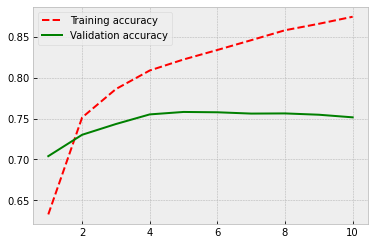

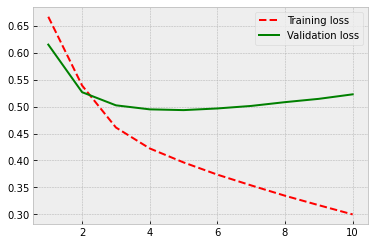

In [11]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

As our first improvement, we could try to use pre-trained embeddings in our model. Word embeddings include semantic information about our words (words appearing in similar contexts are close to each other). Pretrained embeddings are trained using vast amounts of text (billions of words). One could assume that the semantic information in these pre-trained embeddings is of higher quality and should improve our predictions. Let's see...

To be able to use this approach, we need the original IMBD data. Search for aclimdb.zip from the internet.

In [70]:
import os

My raw data is in the *aclImdb* -folder under the work folder

In [71]:
imdb_raw = './aclImdb/'

First, we define empty lists for the reviews and their sentiment labels. Then we collect the negative reviews from *./aclImdb/train/neg* -folder. We also add to the labels-list zero for these cases. A similar approach is repeated for the positive reviews. Thus, in our lists, we have first the negative reviews and the positive reviews.

In [72]:
labels = []
texts = []

In [73]:
# Collect negative reviews
train_neg_dir = os.path.join(imdb_raw,'train','neg')
for file in os.listdir(train_neg_dir):
    f = open(os.path.join(train_neg_dir, file))
    texts.append(f.read())
    f.close()
    labels.append(0)

In [74]:
# Collect positive reviews
train_neg_dir = os.path.join(imdb_raw,'train','pos')
for file in os.listdir(train_neg_dir):
    f = open(os.path.join(train_neg_dir, file))
    texts.append(f.read())
    f.close()
    labels.append(1)

Below is an example text and its' sentiment (0=negative).

In [75]:
texts[0]

'There are some bad movies out there. Most of them are rather fun. "Criminally Insane 1" was one of those flicks. So bad that it was enjoyable and had re-watch value to it. "Criminally Insane 2" has to be one of the worst movies ever made and coming from me, that\'s saying a lot because I am not the type of person to say anything is the worst. But trust me, this was just completely awful and running just 1 hour is 1 hour too long.<br /><br />The movie has a rather incoherent storyline, but who cares about story when all you want to see is a big fat woman running around killing people because she isn\'t being fed. Well, you don\'t see that in this movie, except for all of the flashback sequences that are from the first one. The new storyline could have been really funny with Ethel being sent to a halfway house and murdering everyone in there, but nothing happens until the last 20 minutes of the movie and at that point you are already falling asleep.<br /><br />The camera work in this mo

In [76]:
labels[0]

0

We need Numpy and text-processing tools from the Keras libary.

In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

The following commands tokenise words into vectors.

In [78]:
tokenizer = Tokenizer(num_words = 10000)

In [79]:
tokenizer.fit_on_texts(texts)

The following commands transform each text in texts to a sequence of integers.

Only words known by the tokenizer will be taken into account. It will take into account only the 10000 most frequent words.

In [80]:
sequences = tokenizer.texts_to_sequences(texts)

Now, we use longer texts. We keep the 200 first words from each review.

In [81]:
data = pad_sequences(sequences, maxlen=200)

The following command transforms the labels list to a numpy array.

In [82]:
labels = np.asarray(labels)

In [83]:
data.shape

(25000, 200)

In [84]:
labels.shape

(25000,)

Because the reviews are in order (all the negative reviews first and then the positive reviews), we have to shuffle the data before feeding it to the model.

In [85]:
indices = np.arange(25000)

np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

80 / 20 % separation of the data to training and validation parts.

In [86]:
x_train = data[:20000]
y_train = labels[:20000]
x_val = data[20000: 25000]
y_val = labels[20000: 25000]

The Stanford NLP group offers GLOVE pre-trained embeddings. You can download them from [nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/). We use the glove6B.zip that is trained using 6 billion tokens. Each word is represented as a 100-dimensional vector.

In [87]:
# we use 100-dimensional vectors
embeddings_index = {}
f = open(os.path.join('./glove.6B/', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

GLOVE has 400k tokens.

In [91]:
len(embeddings_index)

400000

We build the embedding matrix by going through our word index and adding its' embeddings from the Glove model (if it is found).

In [92]:
embedding_matrix = np.zeros((10000, 100))
for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Because our model uses now 100-dimensional word vectors, the network also has a lot of more parameters. Our network also has a new 32-neuron dense layer after the Flatten-layer.

In [93]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=200))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________


We set the weights of the embedding layer using the Glove weights in the embedding matrix. The weights need to be locked so that we are not retraining them with our small dataset.

In [94]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Again, we use the RMSprop optimiser, the binary_crossentropy loss function and accuracy as our performance metric.

In [95]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [96]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6591 - acc: 0.6439 - val_loss: 0.5575 - val_acc: 0.7138
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5045 - acc: 0.7554 - val_loss: 0.5326 - val_acc: 0.7366
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4155 - acc: 0.8091 - val_loss: 0.5454 - val_acc: 0.7398
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3605 - acc: 0.8390 - val_loss: 0.7307 - val_acc: 0.6964
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3113 - acc: 0.8618 - val_loss: 0.6184 - val_acc: 0.7422
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2661 - acc: 0.8821 - val_loss: 0.6603 - val_acc: 0.7364
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2195 - acc: 0.9068 - val_loss: 0.8240 - val_acc: 0.7044
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

Not a good performance. Heavy overfitting and worse accuracy. Let's try something else.

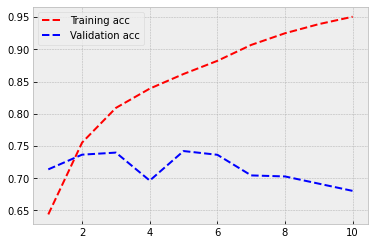

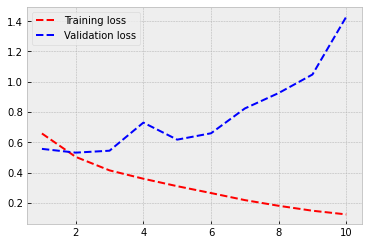

In [97]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b--', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()
plt.show()

### Recurrent neural networks

Next thing that we can try is to use Recurrent neural networks. They are especially efficient for sequences like texts.

![RNN](./images/rnn.svg)

In [98]:
from tensorflow.keras.layers import SimpleRNN

Now, instead of a Flatten() layer, we have a SimpleRNN() layer.

In [99]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=200))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 1,020,201
Trainable params: 1,020,201
Non-trainable params: 0
_________________________________________________________________


Again, we use the GLOVE weights.

In [100]:
# Load GLove wieghts
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 1,020,201
Trainable params: 20,201
Non-trainable params: 1,000,000
_________________________________________________________________


Nothing has changed in the compile() and fit() -steps.

In [102]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [103]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 24s 38ms/step - loss: 0.6528 - acc: 0.6186 - val_loss: 0.6096 - val_acc: 0.6786
Epoch 2/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5957 - acc: 0.6887 - val_loss: 0.5760 - val_acc: 0.7066
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 0.5761 - acc: 0.7047 - val_loss: 0.5618 - val_acc: 0.7272
Epoch 4/10
625/625 [==============================] - 28s 44ms/step - loss: 0.5618 - acc: 0.7147 - val_loss: 0.5384 - val_acc: 0.7428
Epoch 5/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5534 - acc: 0.7227 - val_loss: 0.5499 - val_acc: 0.7248
Epoch 6/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5553 - acc: 0.7169 - val_loss: 0.5894 - val_acc: 0.6918
Epoch 7/10
625/625 [==============================] - 28s 45ms/step - loss: 0.5374 - acc: 0.7325 - val_loss: 0.5234 - val_acc: 0.7494
Epoch 8/10
625/625 [==============================] - 28s 45ms

Well, overfitting is not such a serious problem any more, but the performance is not improving still.

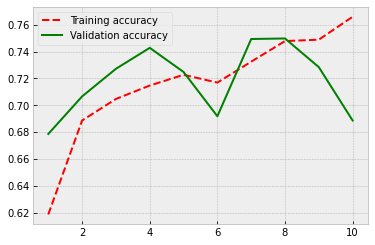

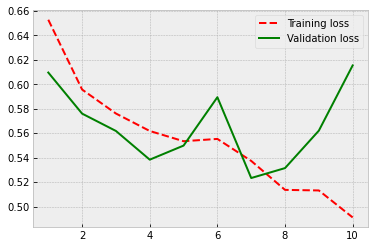

In [104]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

### Long short-term memory

As our last idea, we try the LSTM-version of RNN. It has achieved very good performance in practice, so, let's hope for the best.
![lstm](./images/lstm.svg)

In [105]:
from tensorflow.keras.layers import LSTM

In [106]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=200))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Load GLove wieghts
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [108]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 1,080,501
Trainable params: 80,501
Non-trainable params: 1,000,000
_________________________________________________________________


In [109]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [110]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 0.5607 - acc: 0.7138 - val_loss: 0.4525 - val_acc: 0.7844
Epoch 2/10
625/625 [==============================] - 8s 12ms/step - loss: 0.4275 - acc: 0.8061 - val_loss: 0.6175 - val_acc: 0.7750
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.3619 - acc: 0.8458 - val_loss: 0.3399 - val_acc: 0.8524
Epoch 4/10
625/625 [==============================] - 8s 12ms/step - loss: 0.3254 - acc: 0.8616 - val_loss: 0.3284 - val_acc: 0.8594
Epoch 5/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2937 - acc: 0.8752 - val_loss: 0.3091 - val_acc: 0.8728
Epoch 6/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2712 - acc: 0.8884 - val_loss: 0.2998 - val_acc: 0.8716
Epoch 7/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2455 - acc: 0.9002 - val_loss: 0.3528 - val_acc: 0.8560
Epoch 8/10
625/625 [==============================] - 7s 11ms/step - 

Finally, we see some progress! Now the accuracy is around 87 %. So, a very significant improvement in performance. For the exact evaluation of performance, we should use a separate test set. However, the validation dataset accuracy gives a good indication of the performance of our model.

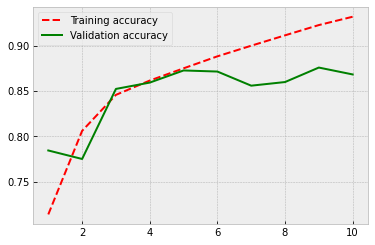

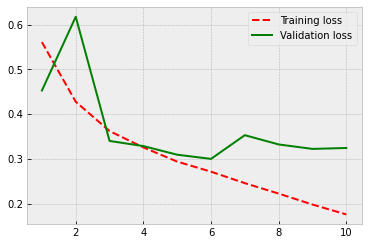

In [112]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

As our final model, let's test what kind of effect the predetermined weights have for the performance and train an LSTM model from scratch.

In [113]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=200))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [115]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 7s 11ms/step - loss: 0.4124 - acc: 0.8138 - val_loss: 0.3248 - val_acc: 0.8686
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.2546 - acc: 0.9002 - val_loss: 0.3000 - val_acc: 0.8792
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2125 - acc: 0.9188 - val_loss: 0.3030 - val_acc: 0.8734
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1897 - acc: 0.9281 - val_loss: 0.3205 - val_acc: 0.8782
Epoch 5/10
625/625 [==============================] - 8s 14ms/step - loss: 0.1685 - acc: 0.9387 - val_loss: 0.3162 - val_acc: 0.8716
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1592 - acc: 0.9424 - val_loss: 0.3449 - val_acc: 0.8752
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1416 - acc: 0.9490 - val_loss: 0.3605 - val_acc: 0.8742
Epoch 8/10
625/625 [==============================] - 7s 11ms/step - 

Because there are no locked parameters, the number of trainable parameters increases, and this causes some overfitting. However, the performance is at the same level as in the previous model. So, the predetermined weights do not appear to improve the accuracy, but they help at fighting overfitting.

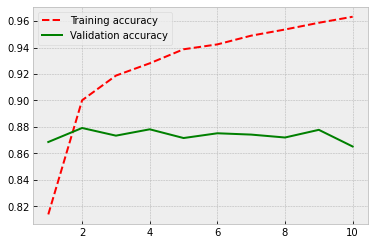

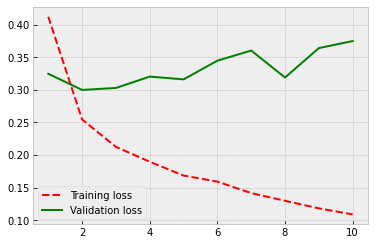

In [116]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()